In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option("display.max_columns", 24)

In [4]:
df_test = pd.read_csv("test.csv", index_col= 0)
df_train = pd.read_csv("train.csv", index_col= 0)
df = pd.concat([df_test, df_train])
df.reset_index(inplace=True, drop = True)
display(df.info(memory_usage = "deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

None

In [5]:
df.dropna(inplace=True)

def change_type_to_category(dataframe):
    """Iterates over the columns of data frame and changes dtype from object to category"""
    for column in dataframe.columns:
        if(dataframe.dtypes[column] == "object") and (dataframe[column].nunique() < round(0.1 * len(dataframe[column]))):
            dataframe[column] = dataframe[column].astype("category")
change_type_to_category(df)

df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].astype("int32")

In [6]:
df.dropna(inplace=True)

In [7]:
def change_type_to_int32(dataframe):
    """Iterates over the columns of data frame and changes dtype from int64 to int32 where possible"""
    for column in dataframe.columns:
        if dataframe.dtypes[column] == "int64" and dataframe[column].max() < 2**32:
            dataframe[column] = dataframe[column].astype("int32")
change_type_to_int32(df)

In [8]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 129487 non-null  int32   
 1   Gender                             129487 non-null  category
 2   Customer Type                      129487 non-null  category
 3   Age                                129487 non-null  int32   
 4   Type of Travel                     129487 non-null  category
 5   Class                              129487 non-null  category
 6   Flight Distance                    129487 non-null  int32   
 7   Inflight wifi service              129487 non-null  int32   
 8   Departure/Arrival time convenient  129487 non-null  int32   
 9   Ease of Online booking             129487 non-null  int32   
 10  Gate location                      129487 non-null  int32   
 11  Food and drink            

In [9]:
display(df.head(3))

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0,neutral or dissatisfied


### Clustering


In [44]:
df_clust = df[["Age", "Gender", "Customer Type"]]

In [45]:
df_clust = pd.get_dummies(df_clust, columns = ["Gender", "Customer Type"])

In [46]:
df_clust.head()

,Age,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,52,1,0,1,0
1,36,1,0,1,0
2,20,0,1,0,1
3,44,0,1,1,0
4,49,1,0,1,0


In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [48]:
df_clust_scaled = scale.fit_transform(df_clust)


numpy.ndarray

In [49]:
display(df_clust_scaled)
display(df_clust)


array([[ 0.83156652,  0.98528819, -0.98528819,  0.47349456, -0.47349456],
       [-0.22680685,  0.98528819, -0.98528819,  0.47349456, -0.47349456],
       [-1.28518021, -1.01493148,  1.01493148, -2.11195667,  2.11195667],
       ...,
       [-0.62369686, -1.01493148,  1.01493148, -2.11195667,  2.11195667],
       [-1.15288354,  0.98528819, -0.98528819, -2.11195667,  2.11195667],
       [-0.82214187, -1.01493148,  1.01493148,  0.47349456, -0.47349456]])

,Age,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,52,1,0,1,0
1,36,1,0,1,0
2,20,0,1,0,1
3,44,0,1,1,0
4,49,1,0,1,0
...,...,...,...,...,...
129875,23,1,0,0,1
129876,49,0,1,1,0
129877,30,0,1,0,1
129878,22,1,0,0,1


In [79]:
np.random.seed(123)
sample_size = 20000
sample = np.random.choice(df_clust_scaled, size=(sample_size, df_clust_scaled.shape[1]), replace=False)


ValueError: a must be 1-dimensional

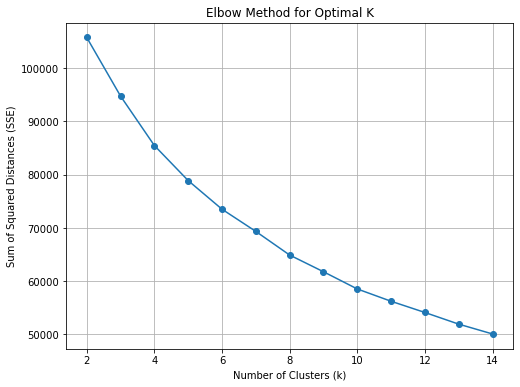

In [62]:
elbow = []

for k in range(2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(sample)
    elbow.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), elbow, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid(True)
plt.show()

In [76]:
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(sample)
    silhouette_avg = silhouette_score(sample, labels)
    print(f"For k={k}, Silhouette Score: {silhouette_avg}")

For k=2, Silhouette Score: 0.1560374059578182
For k=3, Silhouette Score: 0.1399763000142793


In [18]:
model = KMeans(n_clusters=4)
model.fit_predict(df_clust_scaled)

array([0, 0, 3, ..., 3, 2, 1])

In [67]:
sil = silhouette_score(df_clust_scaled, model.fit_predict(df_clust_scaled))
print(f'The silhouette score is {sil}')

The silhouette score is 0.659706912481976


In [66]:
cluster_assignments = model.cluster_centers_
centroids = model.labels_
display(cluster_assignments)
display(centroids)

array([[ 0.13287934,  0.98528819, -0.98528819,  0.47349456, -0.47349456],
       [ 0.13632717, -1.01493148,  1.01493148,  0.47349456, -0.47349456],
       [-0.60738714, -1.01493148,  1.01493148, -2.11195667,  2.11195667],
       [-0.59440437,  0.98528819, -0.98528819, -2.11195667,  2.11195667]])

array([0, 0, 2, ..., 2, 3, 1])

In [37]:
df_clustering = df
display(df_copy)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,clusters
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,...,3,5,5,5,5,2,5,5,50,44,satisfied,0
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,...,5,4,4,4,4,3,4,5,0,0,satisfied,0
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,...,2,2,4,1,3,2,2,2,0,0,neutral or dissatisfied,3
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,...,4,1,1,1,1,3,1,4,0,6,satisfied,1
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,...,2,2,2,2,2,4,2,4,0,20,satisfied,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,...,2,2,3,1,4,2,3,2,3,0,neutral or dissatisfied,2
129876,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,...,5,5,5,5,5,5,5,4,0,0,satisfied,1
129877,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,...,5,4,3,2,4,5,5,4,7,14,neutral or dissatisfied,3
129878,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,...,1,1,4,5,1,5,4,1,0,0,neutral or dissatisfied,2


In [38]:
df_clustering["clusters"] = centroids

In [39]:
df_clustering.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,clusters
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,...,3,5,5,5,5,2,5,5,50,44,satisfied,0
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,...,5,4,4,4,4,3,4,5,0,0,satisfied,0
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,...,2,2,4,1,3,2,2,2,0,0,neutral or dissatisfied,3
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,...,4,1,1,1,1,3,1,4,0,6,satisfied,1
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,...,2,2,2,2,2,4,2,4,0,20,satisfied,0


In [33]:
c = pd.crosstab(df_clustering["Age"], df_clustering["clusters"])

<AxesSubplot:xlabel='clusters', ylabel='Age'>

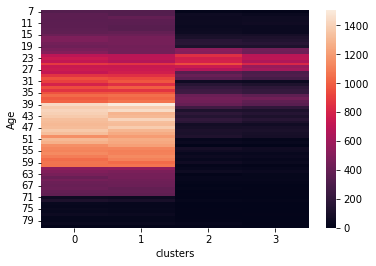

In [35]:
sns.heatmap(c)